# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

#### Цели проекта <br>
- Выполнить предобработку данных
- Изучить данные
- Выявить интересные зависимости
- Определить главные факторы, влияющие на цену квартиры

#### Описание данных <br>
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — общая площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

### Откроем файл с данными и изучим общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# считываем наши данные
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

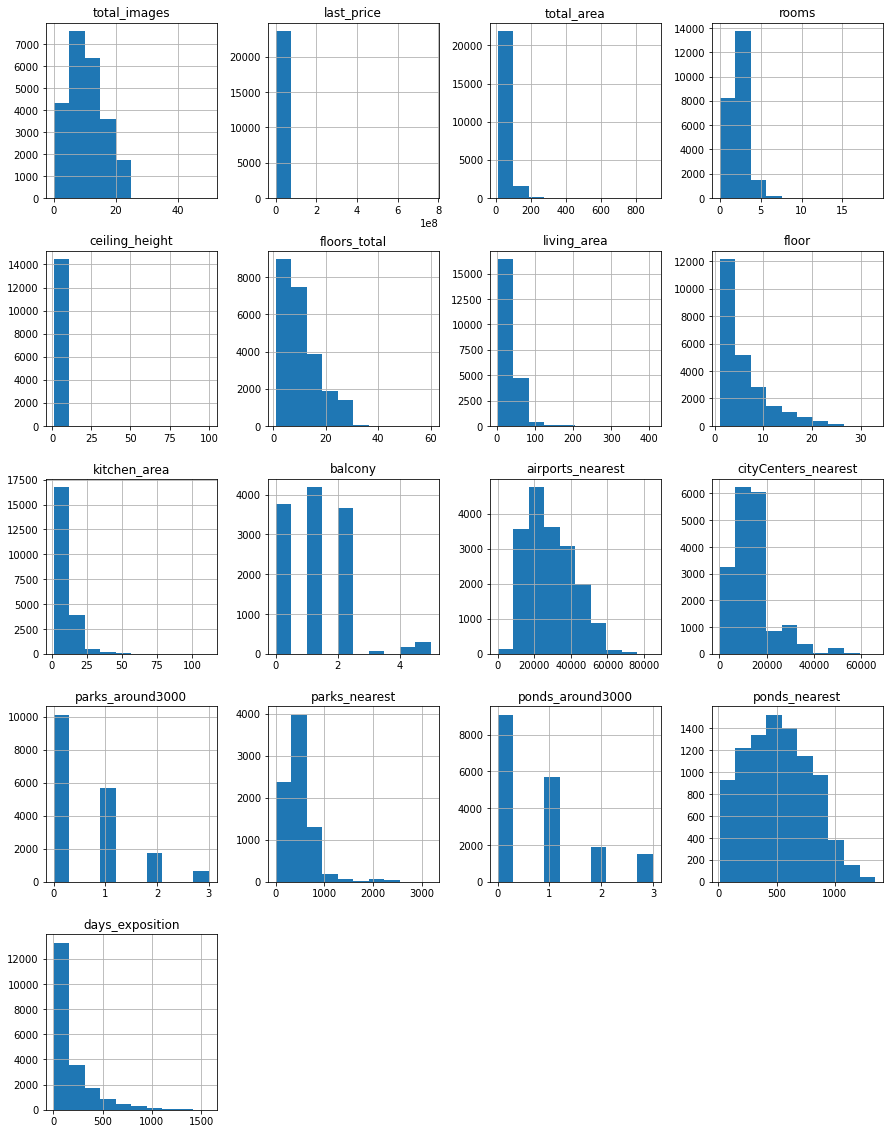

In [4]:
#Строим общую гистограмму
data.hist(figsize=(15, 20));

На основе гистограмм аномалии можно заметить:<br> 
- в столбцах о размерах квартиры (общая площадь, кухня)
- в столбцах о цене квартиры
- в столбце о высоте потолков (максимальное значение 100)
- в столбце о количестве комнат (максимальное значение 15)
- в столбце о длительности объявления (максимальное значение 1500)<br>
Но если в частном доме может быть 15 комнат, то высота потолков 100м  нигде не может быть. От таких анамалий придется избавиться.

<B> Вывод: в данных есть ошибки, такие как неверный тип данных и аномальные значения <B>

### Предобработка данных

Получим общую информацию и посмотрим на типы данных и количество пропусков в данных.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

В данных встречаются ошибки: <br>
- в столбце first_day_exposition тип данных object, а должен быть datetime, потому что это дата
- в столбце is_apartment тип данных object, а должен быть bool, потому что либо это аппартаменты, либо нет
- в столбце balcony тип данных float, а должен быть int, потому что балконом может быть только целое число
<br><br>Пропуски встречаются в столбцах: <br><br>
- ceiling_height
- floors_total
- living_area
- is_apartment
- kitchen_area
- balcony
- locality_name
- airports_nearest
- cityCenters_nearest
- parks_around3000
- parks_nearest
- ponds_around3000
- ponds_nearest
- days_exposition 

% пропущенных значений в колонках

In [6]:
def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot = -5, legend = False, fontsize = 16)
            .set_title('Пример' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) или произошла ошибка в первой части функции ')

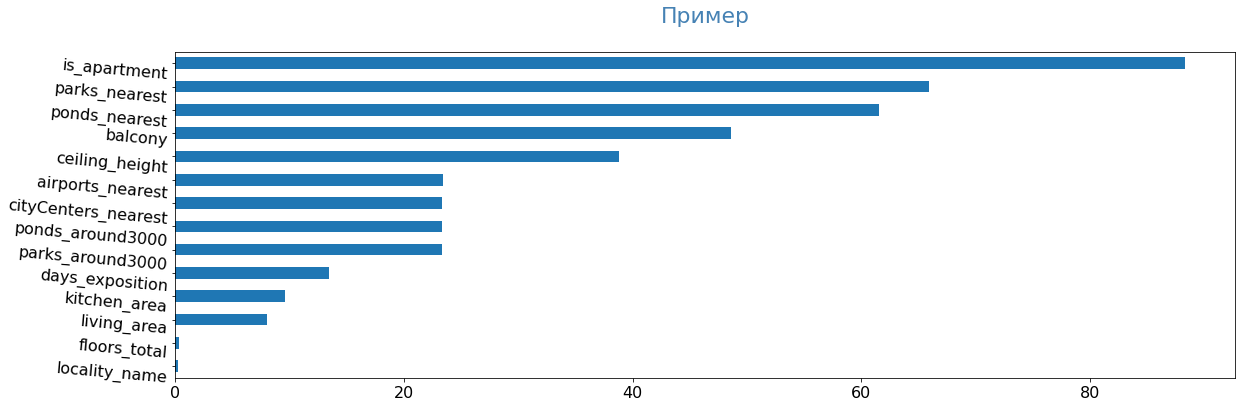

In [7]:
pass_value_barh(data)

#### Изменение типов данных и логическое заполнение пропусков

Исправим все типы данных. Заполним пропуски в столбцах 'balcony' и 'is_apartment'. Пропуски в этих столбцах могли возникнуть из-за того, что люди не заполняют поля, которые не соответсвуют описанию их квартиры: нет балкона - оставляют пропуск, не аппартаменты - оставляют пропуск.

In [8]:
#Изменим тип данных в столбце с датой на временной и проверим изменение
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['first_day_exposition'].dtype

dtype('<M8[ns]')

In [9]:
#Изменим тип данных в столбце об апартаментах и заполним пропуски
data['is_apartment'] = data['is_apartment'].fillna(0)
data['is_apartment'] = data['is_apartment'].astype('float')
data['is_apartment'] = data['is_apartment'].astype('int')
data['is_apartment'] = data['is_apartment'].astype('bool')
data['is_apartment'].isna().sum()

0

In [10]:
data['balcony'] = data['balcony'].fillna(0)
data['balcony'] = data['balcony'].astype('int')
data['balcony'].isna().sum()

0

#### Удаление неявных дубликатов

In [11]:
#Изучим названия населенных пунктов
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Можно заметить множество неявных дубликатов. В некоторых буква е заменена на ё, поэтому заменим все ё на е. В некоторых случая один и тот же населенный пункт назван по разному: городской поселок и поселок городского типа.

In [12]:
#Удалим неявные дубликаты
data['locality_name'] = data['locality_name'].astype('str')
data['locality_name'] = data['locality_name'].str.lower()
data['locality_name'] = data['locality_name'].apply(lambda x:x.replace('ё', 'е'))
data['locality_name'] = data['locality_name'].apply(lambda x:x.replace('городской поселок',
                                                                       'поселок городского типа'))
data['locality_name'] = data['locality_name'].apply(lambda x:x.replace('поселок станции',
                                                                       'поселок при железнодорожной станции'))
data['locality_name'] = data['locality_name'].apply(lambda x:x.replace('коттеджный поселок', 'поселок'))

In [13]:
#Убедимся, что не осталось дубликатов
data['locality_name'].unique()

array(['санкт-петербург', 'поселок шушары',
       'поселок городского типа янино-1', 'поселок парголово',
       'поселок мурино', 'ломоносов', 'сертолово', 'петергоф', 'пушкин',
       'деревня кудрово', 'коммунар', 'колпино',
       'поселок городского типа красный бор', 'гатчина',
       'деревня федоровское', 'выборг', 'кронштадт', 'кировск',
       'деревня новое девяткино', 'поселок металлострой',
       'поселок городского типа лебяжье',
       'поселок городского типа сиверский', 'поселок молодцово',
       'поселок городского типа кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'поселок аннино',
       'поселок городского типа ефимовский', 'поселок плодовое',
       'деревня заклинье', 'поселок торковичи', 'поселок первомайское',
       'красное село', 'поселок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', 'посел

In [14]:
# check
data.locality_name.nunique()

321

In [15]:
# Проверим, что явных дупликатов нет
data.duplicated().sum()

0

In [16]:
data[['total_area', 'floor', 'floors_total', 'cityCenters_nearest', 'locality_name', 'rooms']].duplicated().sum()

209

In [17]:
# check
(
    data[data.duplicated(subset = ['total_area', 'floor', 'last_price', 
                'floors_total', 'cityCenters_nearest', 'locality_name', 'rooms'], keep = False)]
                                    .sort_values(by = ['total_area', 'last_price']).head(10)
)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
13518,10,1850000.0,32.0,2017-08-28,1,NaN,5.0,18.0,2,False,...,5.0,0,отрадное,NaN,NaN,NaN,NaN,NaN,NaN,101.0
15553,0,1850000.0,32.0,2018-10-05,1,NaN,5.0,18.0,2,False,...,5.5,1,отрадное,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1310,10,2350000.0,32.0,2017-03-02,1,NaN,5.0,18.0,3,False,...,5.5,0,гатчина,NaN,NaN,NaN,NaN,NaN,NaN,523.0
7458,7,2350000.0,32.0,2015-02-17,1,NaN,5.0,16.0,3,False,...,5.0,0,гатчина,NaN,NaN,NaN,NaN,NaN,NaN,751.0
8296,7,1748700.0,33.5,2019-01-23,1,NaN,18.0,NaN,2,False,...,7.8,0,никольское,NaN,NaN,NaN,NaN,NaN,NaN,9.0
16153,4,1748700.0,33.5,2016-09-08,1,2.56,18.0,16.7,2,False,...,7.8,0,никольское,NaN,NaN,NaN,NaN,NaN,NaN,895.0
16714,15,1950000.0,33.7,2018-06-11,1,2.60,7.0,18.0,6,False,...,8.0,0,деревня разметелево,NaN,NaN,NaN,NaN,NaN,NaN,131.0
22696,15,1950000.0,33.7,2018-04-13,1,NaN,7.0,18.0,6,False,...,8.0,0,деревня разметелево,NaN,NaN,NaN,NaN,NaN,NaN,193.0
23076,2,2450000.0,35.0,2016-04-13,1,2.80,5.0,14.0,4,False,...,10.5,0,всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,117.0
23677,8,2450000.0,35.0,2018-10-26,1,2.60,5.0,18.0,4,False,...,9.6,0,всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,28.0


#### Удаление аномальных значений

Из общей гистограммы можно заметить, что высота потолков достигает 100м. Это вряд ли возможно, вероятно люди забыли точку в десятичной дроби. Поэтому значения больше 10 можно разделить на 10.

<AxesSubplot:>

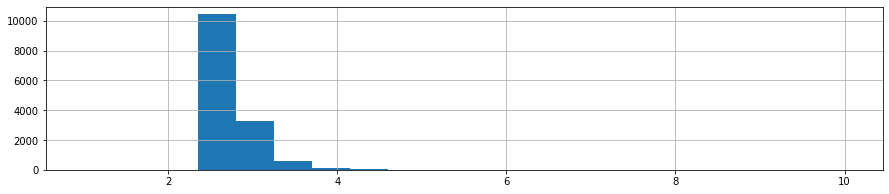

In [18]:
#Удалим большие значения и построим гистограмму
data.loc[data['ceiling_height']>=10, 'ceiling_height'] /=10
data['ceiling_height'].hist(bins=20, figsize=(15,3))

<AxesSubplot:>

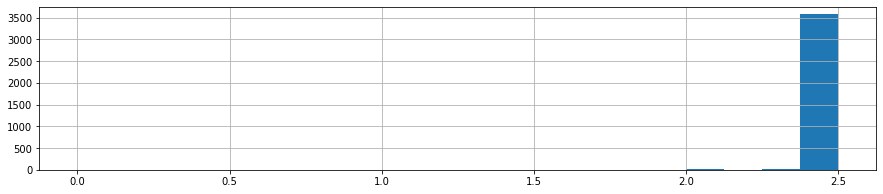

In [19]:
data['ceiling_height'].hist(bins=20, figsize=(15,3), range=(0,2.5))

<AxesSubplot:>

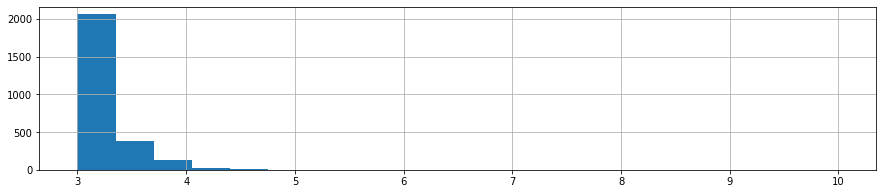

In [20]:
data['ceiling_height'].hist(bins=20, figsize=(15,3), range=(3, 10))

Оставим только значения между 0.0012 и 0.9988 квантилями.

In [21]:
data = data.loc[((data['ceiling_height']<=4.5)&(data['ceiling_height']>=2.25))|(data['ceiling_height'].isna())]

В столбце с общей площадью квартир есть выдающиеся значения больше 300, в столбце с жилой площадью есть выбросы при значении больше 200, в столбце с площадью кухни есть выбросы при значении больше 60, в столбце с количеством комнат выбросы при значении больше 8, но их количество стремится к нулю (менее 1% от всех данных). Такие значение могут повлиять на исследование, поэтому лучше избавиться от них.

<AxesSubplot:>

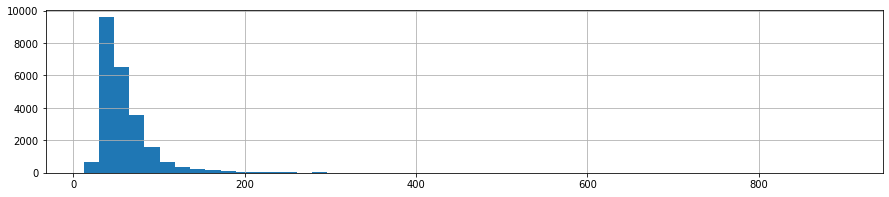

In [22]:
data['total_area'].hist(bins=50, figsize=(15,3))

<AxesSubplot:>

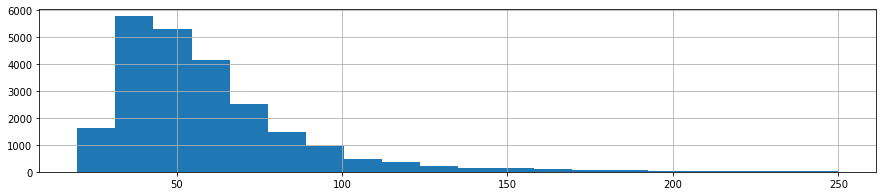

In [23]:
# Уберем аномальные значения в столбце total_area
data = data.loc[(data['total_area']<=250)&(data['total_area']>=20)]
data['total_area'].hist(bins=20, figsize=(15,3))

<AxesSubplot:>

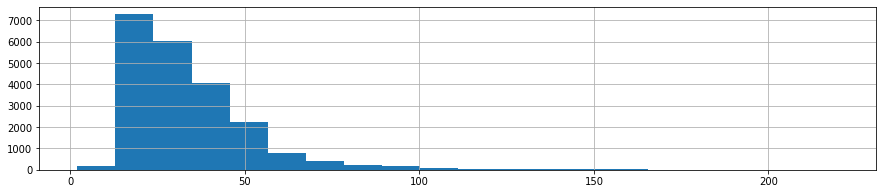

In [24]:
data['living_area'].hist(bins=20, figsize=(15,3))

<AxesSubplot:>

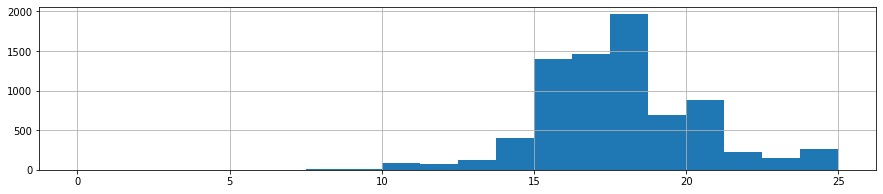

In [25]:
data['living_area'].hist(bins=20, figsize=(15,3), range=(0, 25))

<AxesSubplot:>

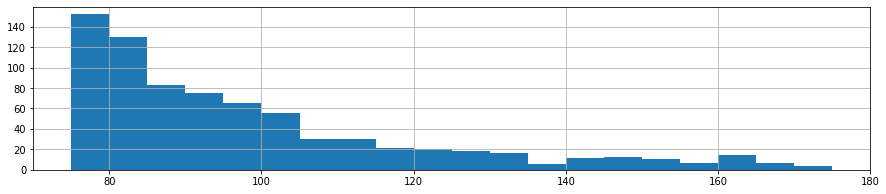

In [26]:
data['living_area'].hist(bins=20, figsize=(15,3), range=(75, 175))

Оставим размах между 0.0012 квантилем и 0.9988 квантилем, то есть квартиры жилой площадью от 10 до 160 квм.

#### check nan

In [27]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23529 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23529 non-null  int64         
 1   last_price            23529 non-null  float64       
 2   total_area            23529 non-null  float64       
 3   first_day_exposition  23529 non-null  datetime64[ns]
 4   rooms                 23529 non-null  int64         
 5   ceiling_height        14384 non-null  float64       
 6   floors_total          23444 non-null  float64       
 7   living_area           21657 non-null  float64       
 8   floor                 23529 non-null  int64         
 9   is_apartment          23529 non-null  bool          
 10  studio                23529 non-null  bool          
 11  open_plan             23529 non-null  bool          
 12  kitchen_area          21298 non-null  float64       
 13  balcony         

<AxesSubplot:>

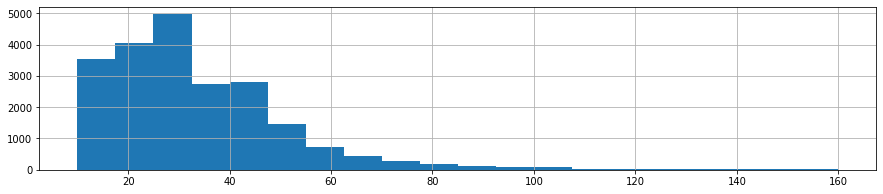

In [28]:
# Уберем аномальные значения в столбце living_area
data = data.loc[((data['living_area']<=160)&(data['living_area']>=10))|(data['living_area'].isna())]
data['living_area'].hist(bins=20, figsize=(15,3))

In [29]:
# check
data.shape[0]

23482

<AxesSubplot:>

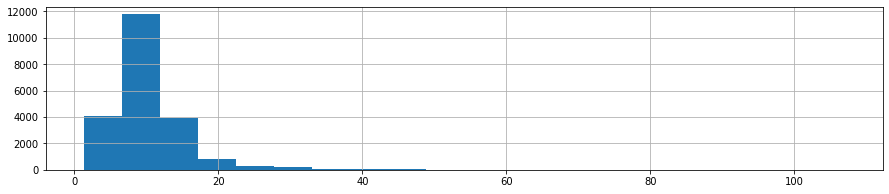

In [30]:
data['kitchen_area'].hist(bins=20, figsize=(15,3))

<AxesSubplot:>

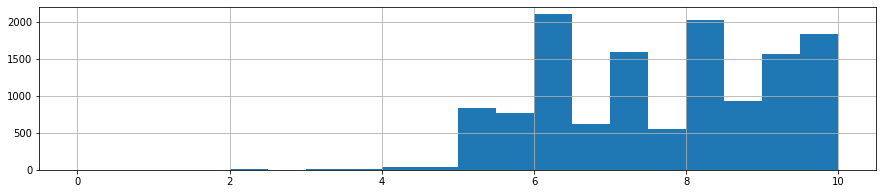

In [31]:
data['kitchen_area'].hist(bins=20, figsize=(15,3), range=(0,10))

<AxesSubplot:>

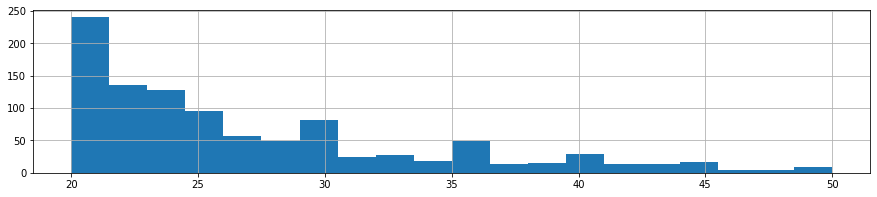

In [32]:
data['kitchen_area'].hist(bins=20, figsize=(15,3), range=(20, 50))

Оставим размах между 0.0012 квантилем и 0.9988 квантилем, то есть квартиры c кухней площадью от 4 до 48 квм.

<AxesSubplot:>

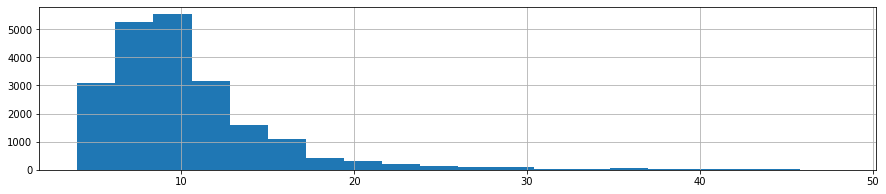

In [33]:
# Уберем аномальные значения в столбце kitchen_area
data = data.loc[((data['kitchen_area']<=48)&(data['kitchen_area']>=4))|(data['kitchen_area'].isna())]
data['kitchen_area'].hist(bins=20, figsize=(15,3))

<AxesSubplot:>

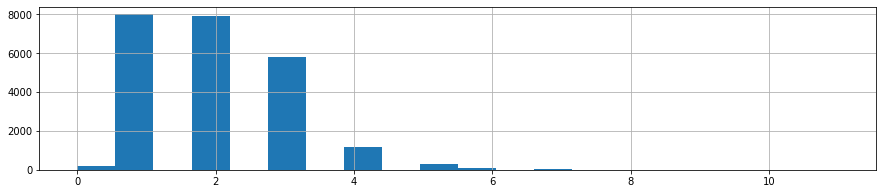

In [34]:
data['rooms'].hist(bins=20, figsize=(15,3))

<AxesSubplot:>

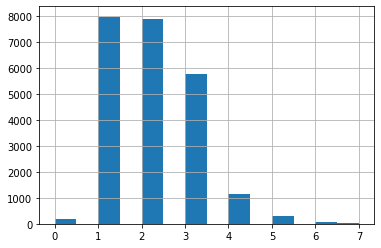

In [35]:
# Уберем аномальные значения в столбце rooms
data = data.loc[(data['rooms']<8)|(data['rooms'].isna())]
data['rooms'].hist(bins=14)

<AxesSubplot:>

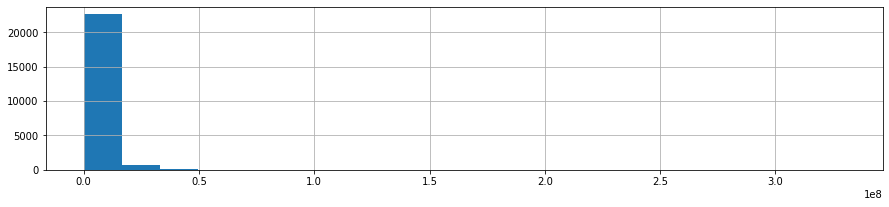

In [36]:
# Посмотрим на цены квартир
data['last_price'].hist(bins=20, figsize=(15,3))

<AxesSubplot:>

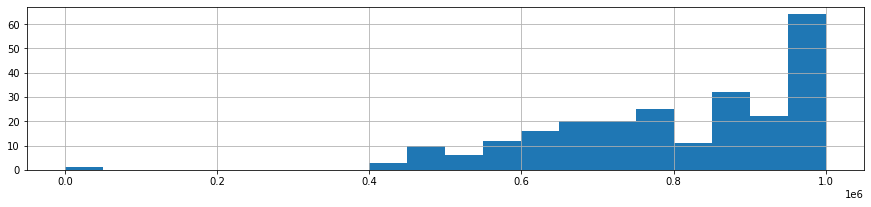

In [37]:
data['last_price'].hist(bins=20, figsize=(15,3), range=(0, 1000000))

<AxesSubplot:>

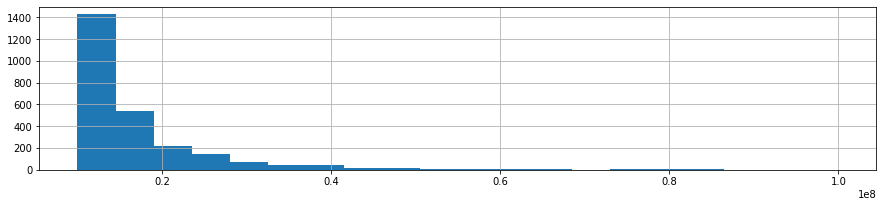

In [38]:
data['last_price'].hist(bins=20, figsize=(15,3), range=(10000000,100000000))

Оставим только значения между 0.0012 квантилем и 0.9988 квантилем, то есть квартиры cтоимость от 560тыс до 54 миллионов.

<AxesSubplot:>

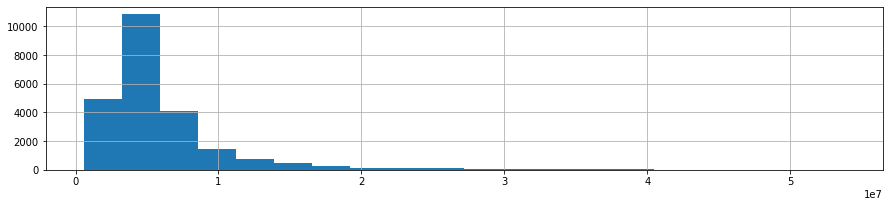

In [39]:
data = data.query('last_price < 54000000 and last_price > 560000')
data['last_price'].hist(bins=20, figsize=(15,3))

Выбросы все еще присутствуют, но разброс стал намного меньше.

#### check gap

In [40]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23327 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23327 non-null  int64         
 1   last_price            23327 non-null  float64       
 2   total_area            23327 non-null  float64       
 3   first_day_exposition  23327 non-null  datetime64[ns]
 4   rooms                 23327 non-null  int64         
 5   ceiling_height        14258 non-null  float64       
 6   floors_total          23243 non-null  float64       
 7   living_area           21470 non-null  float64       
 8   floor                 23327 non-null  int64         
 9   is_apartment          23327 non-null  bool          
 10  studio                23327 non-null  bool          
 11  open_plan             23327 non-null  bool          
 12  kitchen_area          21117 non-null  float64       
 13  balcony         

Изменим тип в столбце с общим количеством этажей и оставим только значения меньше 0.9988 квантиля, то есть меньше 35 этажей.

In [41]:
data = data.dropna(subset=['floors_total'])
data['floors_total'] = data['floors_total'].astype('int')
data = data.query('floors_total <= 35')

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23238 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23238 non-null  int64         
 1   last_price            23238 non-null  float64       
 2   total_area            23238 non-null  float64       
 3   first_day_exposition  23238 non-null  datetime64[ns]
 4   rooms                 23238 non-null  int64         
 5   ceiling_height        14246 non-null  float64       
 6   floors_total          23238 non-null  int64         
 7   living_area           21414 non-null  float64       
 8   floor                 23238 non-null  int64         
 9   is_apartment          23238 non-null  bool          
 10  studio                23238 non-null  bool          
 11  open_plan             23238 non-null  bool          
 12  kitchen_area          21075 non-null  float64       
 13  balcony         

In [43]:
data.shape[0]

23238

<B> Вывод: все типы данных были исправлены, неявные дубликаты приведены к единому названию, выбросы удалены. После обработки осталось 23238 значений (было 23699). Было удалено менее 2% данных. <B>

In [44]:
# check

# Показатели о кол-ве объявлений в датасете, минимальных и максимальных значениях 
# в выбранных параметрах о продаже квартир
# сырые данные

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min','mean', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"23,238.00","23,238.00","14,246.00","20,130.00","23,238.00","21,414.00","21,075.00","23,238.00","23,238.00"
min,0.00,20.00,2.25,1.00,"565,000.00",10.00,4.00,1.00,1.00
mean,2.04,58.44,2.72,180.03,"5,913,801.72",33.46,10.32,5.89,10.71
max,7.00,250.00,4.50,"1,580.00","53,800,000.00",160.00,48.00,33.00,35.00


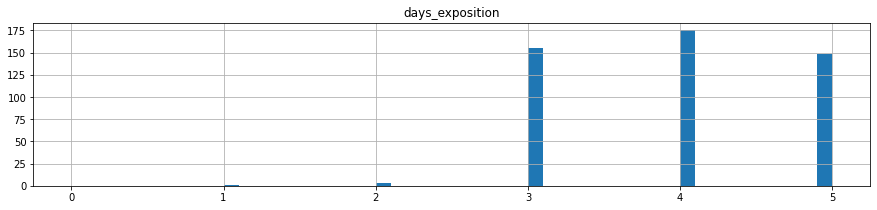

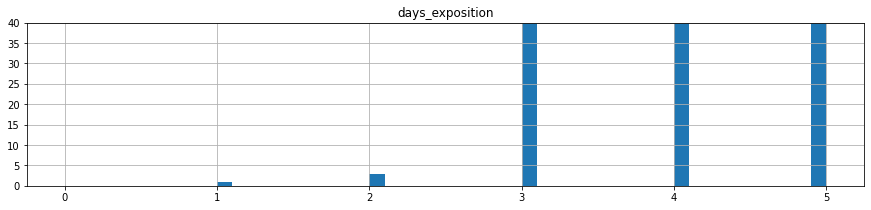

In [45]:
# check
data.hist(column = 'days_exposition', bins = 50, figsize = (15,3), range = (0,5));

data.hist(column = 'days_exposition', bins = 50, figsize = (15,3), range = (0,5))
plt.ylim(0, 40);

In [46]:
# check

try:
    df_check = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')
# если не получилось прочитать файл из локальной папки, то загружаем данные из сети
except:
    df_check = pd.read_csv('real_estate_data.csv', sep='\t')

In [47]:
# check
df_check.rooms.value_counts().to_frame()

,rooms
1,8047
2,7940
3,5814
4,1180
5,326
0,197
6,105
7,59
8,12
9,8


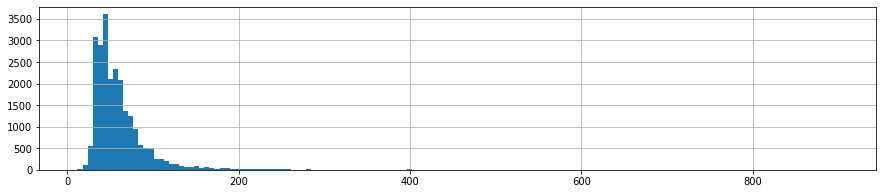

In [48]:
# check
df_check.total_area.hist(bins = 150, figsize = (15,3));

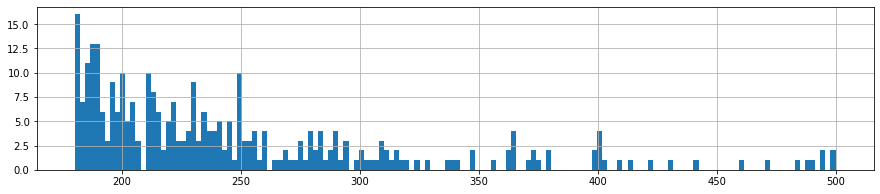

In [49]:
# check
df_check.total_area.hist(bins = 150, figsize = (15,3), range = (180,500));

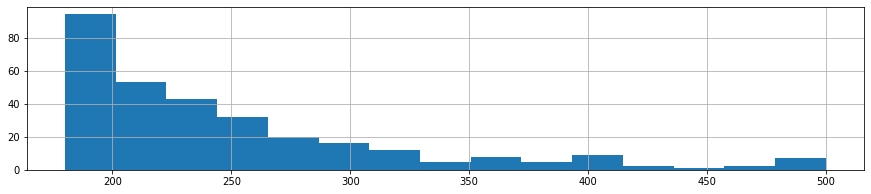

In [50]:
# check
df_check.total_area.hist(bins = 15, figsize = (15,3), range = (180,500));

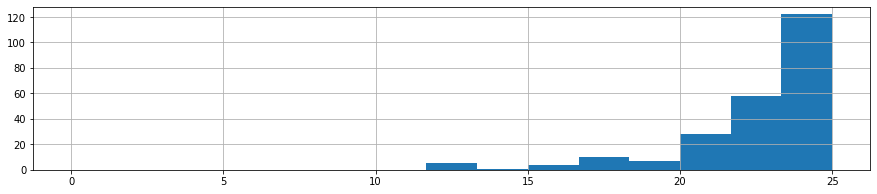

In [51]:
# check
df_check.total_area.hist(bins = 15, figsize = (15,3), range = (0,25));

In [52]:
# check

# Значения параметров объектов недвижимости на разных квантилях

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  
        'kitchen_area', 'floor',   'floors_total']]
    .quantile([0.0012, 0.01, .5, .99, .9988]) # выбираем размах в 0,9976 квантилей 
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
0.0012,0.00,21.90,2.40,3.00,"650,000.00",10.00,4.10,1.00,2.00
0.01,1.00,26.00,2.50,4.00,"1,050,000.00",13.30,5.00,1.00,2.00
0.5,2.00,52.00,2.65,95.00,"4,600,000.00",30.00,9.00,4.00,9.00
0.99,5.00,165.00,3.69,"1,065.71","26,491,540.32",99.99,31.00,23.00,26.00
0.9988,7.00,220.00,4.20,"1,372.23","44,557,800.00",145.00,43.94,26.00,28.00


### Добавим в таблицу новые столбцы

Для удобства дальнейшего исследования добавим в таблицу такие данные: <br>
- цена квадратного метра
- день недели, месяц и год появления объявления
- категорию этажа
- расстояние до центра города в км

In [53]:
# Добавим стоимость квм2
data['price_for_one_metre'] = data['last_price']/data['total_area']

In [54]:
# Добавим день, месяц и год
data['day'] = data['first_day_exposition'].dt.weekday
data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year

In [55]:
# Добавим тип этажа
def what_type(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    return 'другое'
data['floor_type'] = data.apply(what_type, axis=1)

In [56]:
# Добавим расстояние до центра города в км
data['to_city_center'] = data['cityCenters_nearest']/1000
data['to_city_center'] = round(data['to_city_center'], 0)

In [57]:
# Убедимся, что все добавилось 
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_one_metre,day,month,year,floor_type,to_city_center
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,482.0,2.0,755.0,NaN,120370.370370,3,3,2019,другое,16.0
1,7,3350000.0,40.4,2018-12-04,1,NaN,11,18.6,1,False,...,NaN,0.0,NaN,81.0,82920.792079,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5,34.3,4,False,...,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,другое,14.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,другое,8.0
5,10,2890000.0,30.4,2018-09-10,1,NaN,12,14.4,5,False,...,NaN,NaN,NaN,55.0,95065.789474,0,9,2018,другое,NaN


<B> Вывод: для удобства в таблицу были добавленны столбцы с ценой квадратного метра, днем недели, номером месяца и года, тип этажа и расстояние до центра города в км <B>

### Исследовательский анализ данных

#### Изучение данных в отдельных столбцах

Рассмотрим отдельные столбцы, после удаления аномальных значений

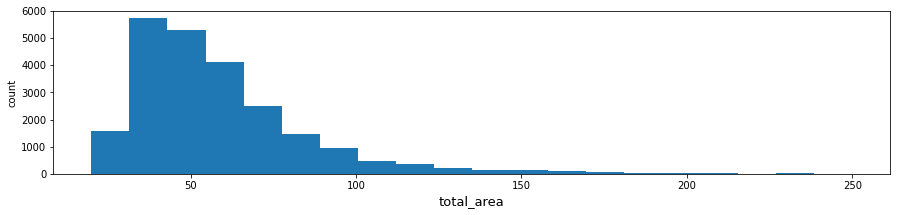

In [58]:
plt.figure(figsize=(15,3))
plt.hist(data['total_area'], bins=20)
plt.xlabel('total_area', fontsize=13)
plt.ylabel('count')
plt.show()

Больше всего квартир с площадью около 40 квадратных метров, дале по убыванию, чем больше квартира, тем меньше объявлений. 

10.0
160.0


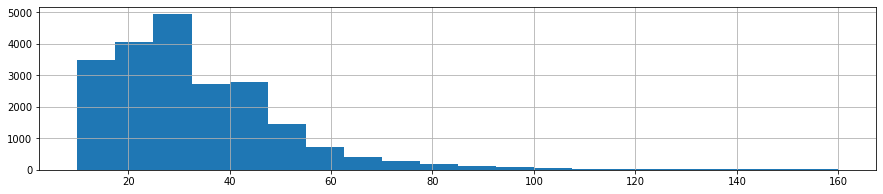

In [59]:
data['living_area'].hist(bins=20, figsize=(15,3))
print(data['living_area'].min())
print(data['living_area'].max())

Больше всего квартир с жилой площадью около 30 квадратных метров, дале по убыванию, чем больше площадь, тем меньше объявлений, как и в предыдущем пункте.

4.0
48.0


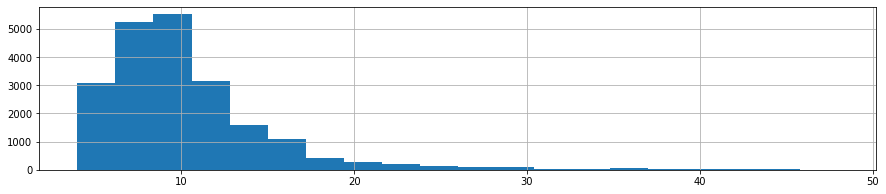

In [60]:
data['kitchen_area'].hist(bins=20, figsize=(15,3))
print(data['kitchen_area'].min())
print(data['kitchen_area'].max())

В большинстве объявлений кухня от 5 квм до 12 квм. 

565000.0
53800000.0


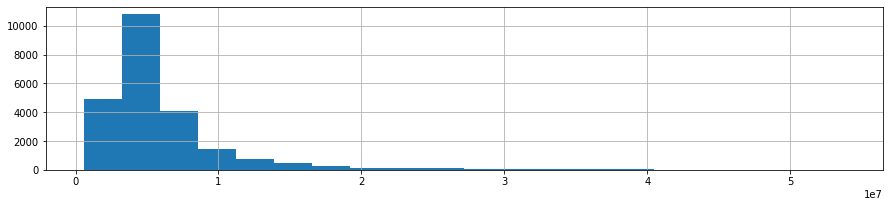

In [61]:
data['last_price'].hist(bins=20, figsize=(15,3))
print(data['last_price'].min())
print(data['last_price'].max())

Большинство квартир стоят до 10 миллионов рублей. 

<AxesSubplot:>

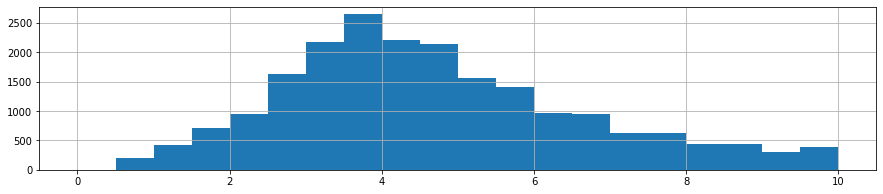

In [62]:
(data['last_price']/1000000).hist(bins=20, figsize=(15,3), range=(0,10))

Больше всего квартир стоимость около 4 миллионов. 

<AxesSubplot:>

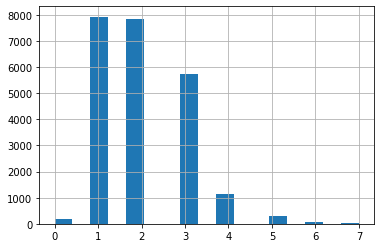

In [63]:
data['rooms'].hist(bins=17)

Больше всего двухкомнатных квартир. Однокомнатных примерно столько же (больше 7000 объявлений). Меньше всего квартир, где число комнат 6 и выше.

<AxesSubplot:>

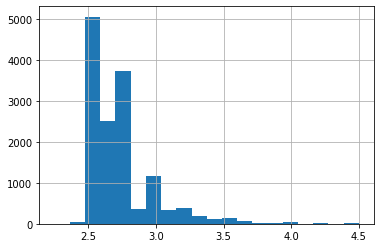

In [64]:
data['ceiling_height'].hist(bins=20)

В большинстве объявлений стандартная высота потолков от 2,4 метра (минимальная норма), до 3 метров.

<AxesSubplot:>

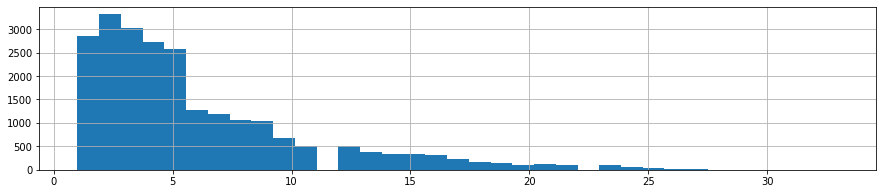

In [65]:
data['floor'].hist(bins=35, figsize=(15,3))

Большинство квартир располагается с 1 по 4 этаж. Больше всего на 2 этаже.

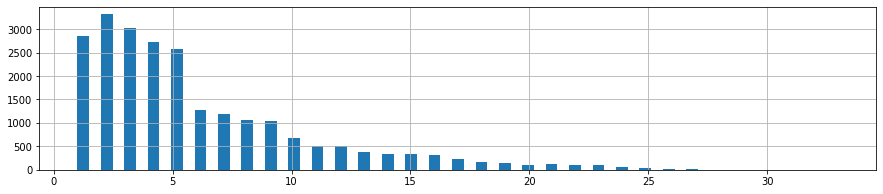

In [66]:
# check
data['floor'].hist(bins=65, figsize=(15,3));

<AxesSubplot:>

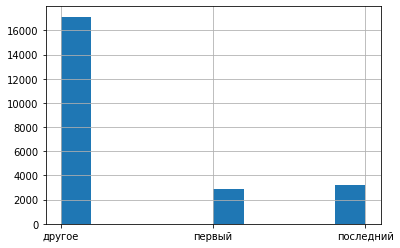

In [67]:
data['floor_type'].hist()

Больше всего квартир располагается между первым и последним (более 15000 объявлений). На первом и на последнем этаже примерно равное число квартир (около 3000).

<AxesSubplot:>

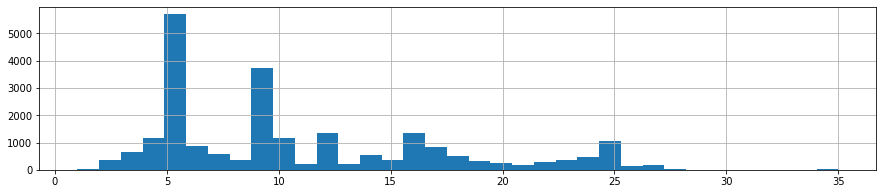

In [68]:
data['floors_total'].hist(bins=35, figsize=(15,3))

Минимальное значение 1 этаж, значит в данных все таки встречаются частные дома. Большинство квартир находятся в пятиэтажках и девятиэтажках, как и принято в России.

<AxesSubplot:>

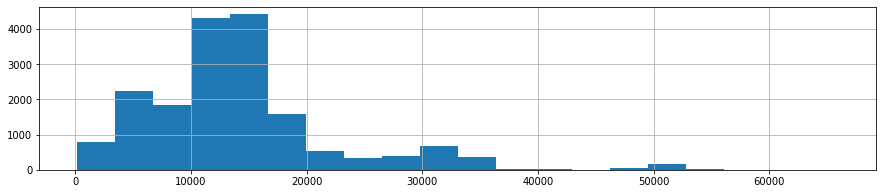

In [69]:
data['cityCenters_nearest'].hist(bins=20, figsize=(15,3))

В основном квартиры располагаются в радиусе 20км от центра города. Большинство квартир находятся чуть более 10км до центра.

0.0
84869.0


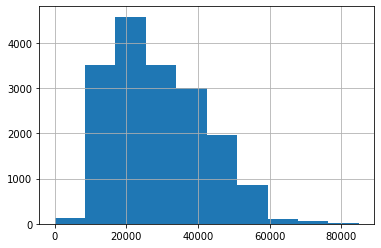

In [70]:
data['airports_nearest'].hist()
print(data['airports_nearest'].min())
print(data['airports_nearest'].max())

Аэропорт находится дальше, чем в 10км от 99% квартир. Некоторые квартиры располагаются у аэропорта, а максимальное значение 85км от аэропорта. При этом основная масса находится в 20км от аэропорта.

1.0

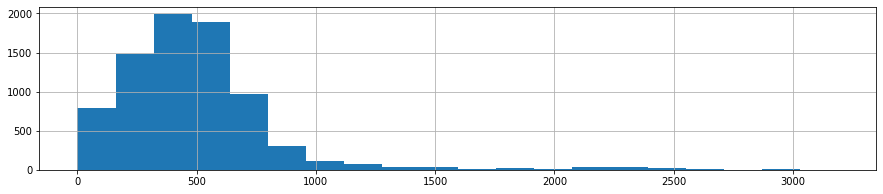

In [71]:
data['parks_nearest'].hist(bins=20, figsize=(15,3))
data['parks_nearest'].min()

Рядом с каждой квартирой есть хотя бы один парк. У большинства объектов более 300 парков рядом.

<AxesSubplot:>

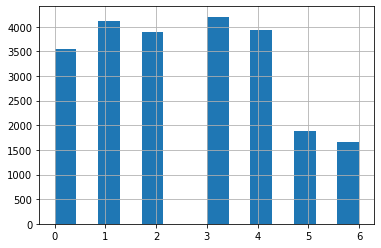

In [72]:
data['day'].hist(bins=14)

Больше всего объявлений было опубликовано в четверг, меньше всего в воскресение.

<AxesSubplot:>

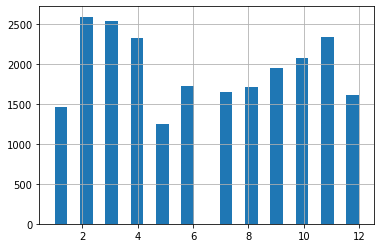

In [73]:
data['month'].hist(bins=24)

Больше всего объявлений было опубликовано в феврале, меньше всего в мае.

#### Исследование скорости продажи квартиры

<AxesSubplot:>

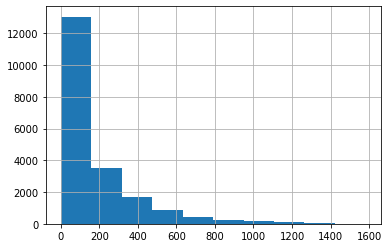

In [74]:
data['days_exposition'].hist()

count    20130.000000
mean       180.031992
std        218.869117
min          1.000000
25%         45.000000
50%         95.000000
75%        230.000000
max       1580.000000
Name: days_exposition, dtype: float64

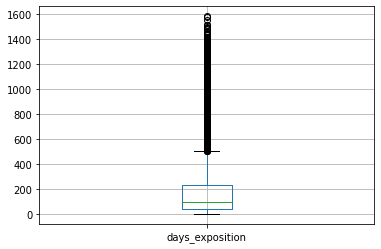

In [75]:
data.boxplot(column='days_exposition')
plt.show
data['days_exposition'].describe()

In [76]:
data['days_exposition'].quantile([0.1, 0.2, .8, .9]) 

0.1     17.0
0.2     34.0
0.8    286.0
0.9    456.0
Name: days_exposition, dtype: float64

Медианное значение 95 дней. <br>
Среднее значение 180 дней. <br>
Данные не однородны. Есть большой разброс. <br>
80% квартир были проданы за менее, чем 286 дней. Значит остальные значения можно считать долгими продажами. <br>
20% квартир были проданы менее, чем за 34 дней. Такие значения можно считать быстрыми продажами. <br>
<B> Вывод: половина квартир продается за менее, чем 95 дней, при этом в среднем квартиры продаются за 180 дней. Быстрыми можно считать продажи за менее 34 дней. Медленные продажи - дольше 286 дней. <B>

911.8869565217391


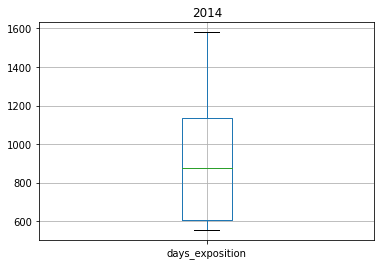

647.2822878228782


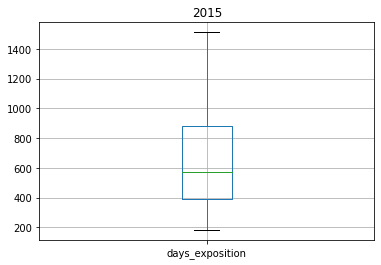

320.7112781954887


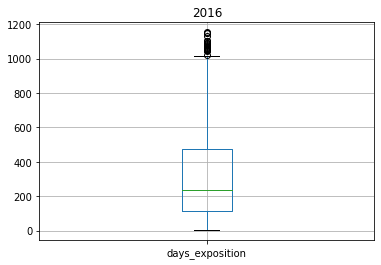

158.42570177697655


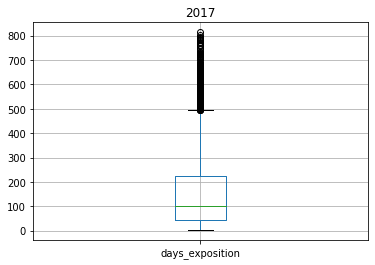

94.23101733637952


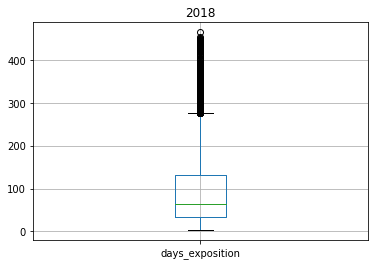

30.94360902255639


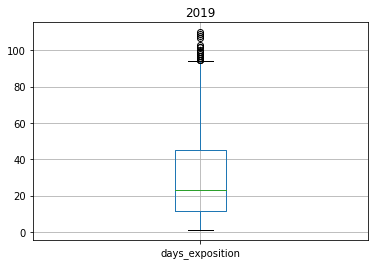

In [77]:
years = [2014, 2015, 2016, 2017, 2018, 2019]
for elem in years:
    print(data.query('year==@elem')['days_exposition'].mean())
    data.query('year==@elem').boxplot(column='days_exposition')
    plt.title(elem)
    plt.show()

Можно заметить, что медианное и среднее значение срока продажи снижается с каждым годом.

0.7696167296124542

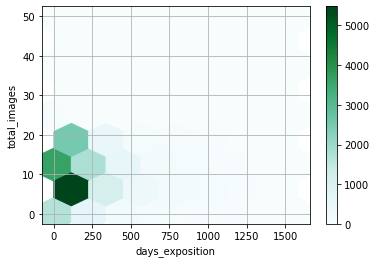

In [78]:
data.plot(x='days_exposition', y='total_images', kind='hexbin', gridsize=7, sharex=False, grid=True)
data['last_price'].corr(data['total_area'])

Как будто чем больше фотографий, тем дольше продается квартира. И коэфицент корреляции говорит об этом.

#### Влияние факторов на полную стоимость квартиры

0.7696167296124542

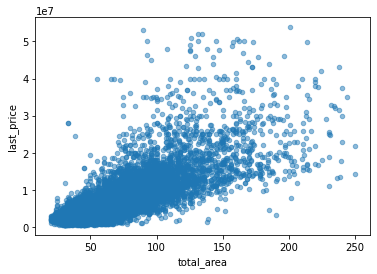

In [79]:
# Влияние общей площади
data.plot(x='total_area', y='last_price', kind='scatter', alpha=0.5)
data['last_price'].corr(data['total_area'])

Диаграмма рассеяния и коэфицент Пирсона 0.77 показывают высокое влияние общей площади на конечную стоимость объекта.

0.6696226913443704

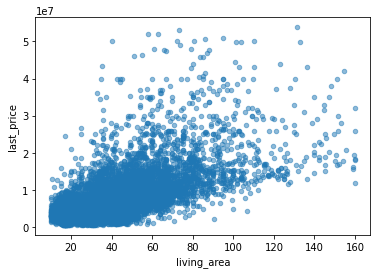

In [80]:
# Влияние жилой площади
data.plot(x='living_area', y='last_price', kind='scatter', alpha=0.5)
data['last_price'].corr(data['living_area'])

Коэфицент Пирсона равен 0.66, это значит жилая площадь тоже сильно влияет на конечную стоимость объекта.

0.5859260547335654

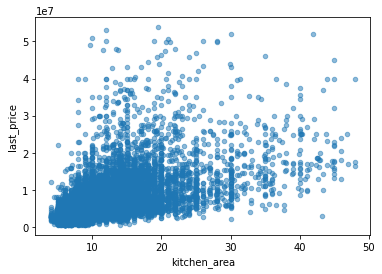

In [81]:
# Влияние размера кухни
data.plot(x='kitchen_area', y='last_price', kind='scatter', alpha=0.5)
data['last_price'].corr(data['kitchen_area'])

Коэфицент Пирсона равен 0.57, что меньше, чем у двух предыдущих факторов, но корреляция все же присутсвует.

0.4809549639648968

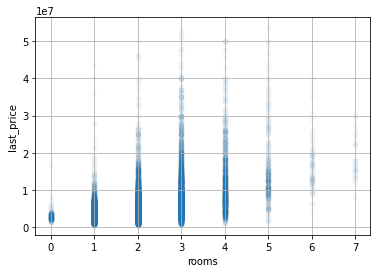

In [82]:
data.plot(x='rooms', y='last_price', kind='scatter', grid=True, alpha=0.03)
data['last_price'].corr(data['rooms'])

Коэфицент Пирсона показывает, что влияние есть. На первых трех значениях это хорошо видно - столбкики становятся выше.

<AxesSubplot:xlabel='floor_type'>

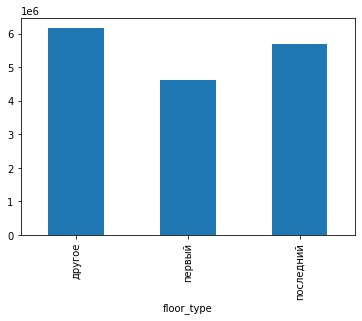

In [83]:
data.groupby('floor_type')['last_price'].mean().plot(y='floor_type', kind='bar')

Однозначного влияния нет, но можно точно заметить, что на первом этаже квартиры в среднем дешевле, чем на других

<AxesSubplot:xlabel='day'>

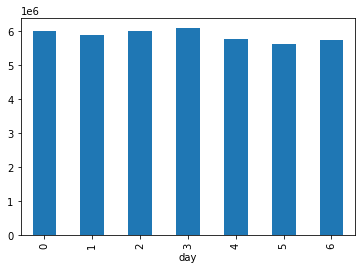

In [84]:
data.groupby('day')['last_price'].mean().plot(y='day', kind='bar')

Зависимости нет, значения располагаются примерно одинакого в каждом из дней.

<AxesSubplot:xlabel='month'>

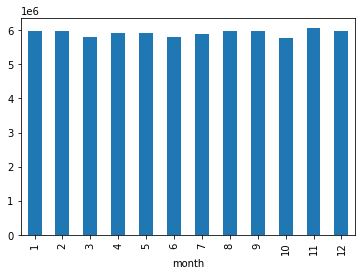

In [85]:
data.groupby('month')['last_price'].mean().plot(y='month', kind='bar')

Месяц не влияет на стоимость квартиры.

<AxesSubplot:xlabel='year'>

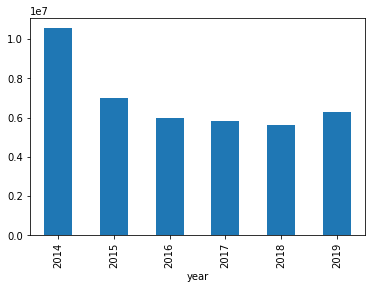

In [86]:
data.groupby('year')['last_price'].mean().plot(y='year', kind='bar')

<AxesSubplot:xlabel='year'>

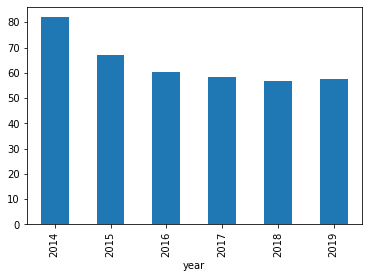

In [87]:
data.groupby('year')['total_area'].mean().plot(y='year', kind='bar')

<AxesSubplot:xlabel='year'>

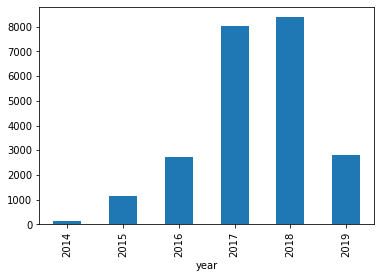

In [88]:
data.groupby('year')['last_price'].count().plot(y='year', kind='bar')

С 2014 по 2018 года средняя цена на квартитры снижалась, как и средняя площадь квартир. Количество предложений в этот период постоянно росло. <br>
Можно сделать вывод, что на цену квартир относительно года, влияет уменьшение средней площади квартир и увеличесние предложения квартир.

<B> Вывод: самое сильно влияние на конечную стоимость квартиры оказывает общая площадь. Также влияет размер жилой площади, кухни и количество комнат. Год влияет на цену совместно с другими параметрами. На первом этаже квартиры дешевле. <B>

#### Cредняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [89]:
# Определим 10 населенных пунктов с наибольшим числом объявлеий
data['locality_name'].value_counts().head(10)

санкт-петербург      15342
поселок мурино         548
поселок шушары         437
всеволожск             397
пушкин                 363
колпино                337
поселок парголово      327
гатчина                307
деревня кудрово        299
выборг                 235
Name: locality_name, dtype: int64

In [90]:
# Создадим датафрейм с названиями и количеством объявлений
topdf = pd.DataFrame({'locality':['санкт-петербург', 'поселок мурино', 'поселок шушары',
                                  'всеволожск', 'пушкин', 'колпино', 'поселок парголово', 'гатчина',
                                  'деревня кудрово', 'выборг'],
                      'count':[15342, 548, 437, 397, 363, 337, 327, 307, 299, 235]})
topdf

,locality,count
0,санкт-петербург,15342
1,поселок мурино,548
2,поселок шушары,437
3,всеволожск,397
4,пушкин,363
5,колпино,337
6,поселок парголово,327
7,гатчина,307
8,деревня кудрово,299
9,выборг,235


In [91]:
# check TOP-10
# способы группировки и сортировки информации

(
    data
    .groupby('locality_name')['price_for_one_metre']
    .agg({'count', 'mean'})
    .sort_values(by = 'count', ascending = False)
    .head(10)
    
).sort_values(by = 'mean', ascending = False).style.format("{:,.0f}")

# .plot(y = 'mean', kind = 'bar')

,count,mean
locality_name,,
санкт-петербург,"15,342","112,127"
пушкин,363,"102,884"
деревня кудрово,299,"92,474"
поселок парголово,327,"90,176"
поселок мурино,548,"85,526"
поселок шушары,437,"78,555"
колпино,337,"75,333"
гатчина,307,"68,746"
всеволожск,397,"68,719"


In [92]:
# Посчитаем сумму всех цен и поделим на количество, добавим все в нашу таблицу и посмотри на итог
price_sum = []
for elem in topdf['locality']:
    x = data.loc[data['locality_name']==elem, 'price_for_one_metre'].sum()
    price_sum.append(x)
topdf['sum'] = price_sum
topdf['price_m'] = round(topdf['sum']/topdf['count'],2)
topdf = topdf.sort_values(by='price_m', ascending=False)
topdf

,locality,count,sum,price_m
0,санкт-петербург,15342,1.720256e+09,112127.24
4,пушкин,363,3.734684e+07,102883.85
8,деревня кудрово,299,2.764959e+07,92473.55
6,поселок парголово,327,2.948752e+07,90175.91
1,поселок мурино,548,4.686806e+07,85525.66
2,поселок шушары,437,3.432850e+07,78554.91
5,колпино,337,2.538732e+07,75333.30
7,гатчина,307,2.110507e+07,68746.15
3,всеволожск,397,2.728157e+07,68719.32
9,выборг,235,1.368596e+07,58238.14


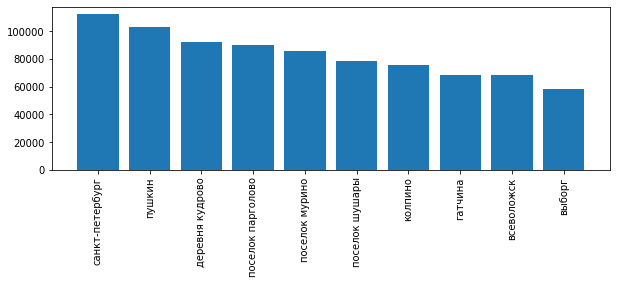

In [95]:
fig = plt.figure(figsize=(10,3))
plt.bar(topdf['locality'], topdf['price_m'])
plt.xticks(rotation=90)
plt.show()

Выше находится таблица из 10 самых больших по количеству объявлений населенных пунктов и средняя цена за квадратный метр в этих регионах. <br>
<B> Вывод: <br> Населенные пункты с самой высокой ценой за квадратный метр - Санкт-Петербург и Пушкин <br> Населенные пункты с самой низкой ценой за квадратный метр - Всеволжск и Выборг <B>

#### Средняя цена одного километра в Санкт-Петербурге

Рассматриваем среднюю цену одного квадратного метра, а не конечной стоимости объекта, так как на разном расстоянии могут преобладать разные по размеру квартиры. Для визуализации построим столбчатую диаграмму.

to_city_center
0.0     20.035529
1.0     12.680288
2.0     12.152004
3.0     10.057652
4.0     11.027789
5.0     11.414859
6.0     11.563983
7.0     11.400896
8.0      8.882758
9.0      6.909094
10.0     6.408712
11.0     6.117232
12.0     5.802206
13.0     6.060458
14.0     5.587447
15.0     5.795119
16.0     5.385644
17.0     5.225974
18.0     4.904778
19.0     5.062451
20.0     5.870706
21.0     5.489381
22.0     5.415524
23.0     4.985376
24.0     3.854430
25.0     4.052840
26.0     4.014287
27.0     8.300000
28.0     5.026429
29.0     4.236667
Name: last_price, dtype: float64


<AxesSubplot:xlabel='to_city_center'>

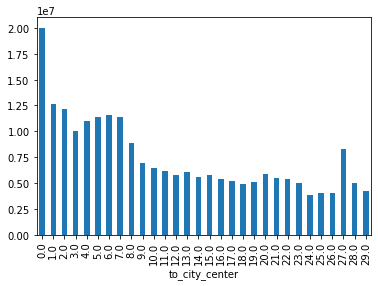

In [96]:
# Сгруппируем данные по расстоянию и вычислим среднюю стоимость одного квадратного метра, построим столбчатую диаграмму
print(data[data['locality_name']=='санкт-петербург'].groupby('to_city_center')['last_price'].agg('mean')/1000000)
data[data['locality_name']=='санкт-петербург'].groupby('to_city_center')['last_price'].agg('mean').plot(kind='bar')

In [97]:
for elem in sorted(data.query('locality_name=="санкт-петербург"')['to_city_center'].unique()):
    print(f'Доля квартир на 1 этаже на {elem} километре:', 
          data.query('to_city_center==@elem and locality_name=="санкт-петербург" and floor_type=="первый"')['day']
          .count()/data.query('to_city_center==@elem and locality_name=="санкт-петербург"')['day'].count())
    print(f'Доля квартир на последнем этаже на {elem} километре:', 
          data.query('to_city_center==@elem and locality_name=="санкт-петербург" and floor_type=="последний"')['day']
          .count()/data.query('to_city_center==@elem and locality_name=="санкт-петербург"')['day'].count())

Доля квартир на 1 этаже на 0.0 километре: 0.13636363636363635
Доля квартир на последнем этаже на 0.0 километре: 0.18181818181818182
Доля квартир на 1 этаже на 1.0 километре: 0.12941176470588237
Доля квартир на последнем этаже на 1.0 километре: 0.2411764705882353
Доля квартир на 1 этаже на 2.0 километре: 0.15714285714285714
Доля квартир на последнем этаже на 2.0 километре: 0.25357142857142856
Доля квартир на 1 этаже на 3.0 километре: 0.1582089552238806
Доля квартир на последнем этаже на 3.0 километре: 0.2298507462686567
Доля квартир на 1 этаже на 4.0 километре: 0.11561561561561562
Доля квартир на последнем этаже на 4.0 километре: 0.16516516516516516
Доля квартир на 1 этаже на 5.0 километре: 0.08932714617169374
Доля квартир на последнем этаже на 5.0 километре: 0.1519721577726218
Доля квартир на 1 этаже на 6.0 километре: 0.10956521739130434
Доля квартир на последнем этаже на 6.0 километре: 0.1426086956521739
Доля квартир на 1 этаже на 7.0 километре: 0.08163265306122448
Доля квартир на пос

/tmp/ipykernel_63/1656968296.py:3: RuntimeWarning: invalid value encountered in long_scalars
  data.query('to_city_center==@elem and locality_name=="санкт-петербург" and floor_type=="первый"')['day']
/tmp/ipykernel_63/1656968296.py:6: RuntimeWarning: invalid value encountered in long_scalars
  data.query('to_city_center==@elem and locality_name=="санкт-петербург" and floor_type=="последний"')['day']


In [98]:
for elem in sorted(data.query('locality_name=="санкт-петербург"')['to_city_center'].unique()):
    print('километр', elem)
    print(data.query('to_city_center==@elem and locality_name=="санкт-петербург"')['rooms'].value_counts())
    x = data.query('to_city_center==@elem and locality_name=="санкт-петербург"')['rooms'].count()
    y = data.query('to_city_center==@elem and locality_name=="санкт-петербург" and rooms>=3')['rooms'].count()
    print('доля больших квартир', y/x)

километр 0.0
2    8
3    7
5    4
1    2
7    1
Name: rooms, dtype: int64
доля больших квартир 0.5454545454545454
километр 1.0
3    62
2    47
4    38
5     9
1     8
6     3
7     3
Name: rooms, dtype: int64
доля больших квартир 0.6764705882352942
километр 2.0
2    89
3    81
4    52
5    23
1    22
6    11
0     1
7     1
Name: rooms, dtype: int64
доля больших квартир 0.6
километр 3.0
3    109
2    105
4     48
1     34
5     25
6      8
7      5
0      1
Name: rooms, dtype: int64
доля больших квартир 0.582089552238806
километр 4.0
3    203
2    185
4    107
1     91
5     57
6     16
7      6
0      1
Name: rooms, dtype: int64
доля больших квартир 0.5840840840840841
километр 5.0
3    282
2    242
1    145
4    129
5     42
6     14
7      6
0      2
Name: rooms, dtype: int64
доля больших квартир 0.548723897911833
километр 6.0
2    190
3    174
1    127
4     45
5     21
7      7
0      6
6      5
Name: rooms, dtype: int64
доля больших квартир 0.43826086956521737
километр 7.0
2    15

/tmp/ipykernel_63/1523016132.py:6: RuntimeWarning: invalid value encountered in long_scalars
  print('доля больших квартир', y/x)


На 27 километре всего 2 квартиры и одна из них на последнем этаже. Поэтому на этом километре такая высокая цена. <br>
В середине графика наблюдается просадок, так как снижается доля квартир на последнем этаже (с 11 по 15 меньше 10%), и снижается доля квартир в которых не менее 3 комнат.

По диаграмме можно заметить тенденцию к снижению стоимости квартир, отдаляясь от центра. Но все же есть много скачков, которые не дают однозначно определить стоимость одного километра. Но если рассчитать ее, как средняя стоимость нулевого километра минус стоимость последнего киллометра и разделить на количество километров, то получим, что стоимость одного километра составляет примерно 544788 тысяч рублей. <br>
<B> Вывод: стоимость одного километра составляет примерно 544788 рублей <B>

In [99]:
# check
(
    data
        .query('locality_name=="санкт-петербург" and to_city_center == 3')['floor_type']
        .value_counts(normalize=True).to_frame().round(2)
)

,floor_type
другое,0.61
последний,0.23
первый,0.16


In [100]:
data.query('to_city_center==27 and locality_name=="санкт-петербург"')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_one_metre,day,month,year,floor_type,to_city_center
748,13,14350000.0,74.0,2017-11-28,2,3.13,5,30.0,3,False,...,1496.0,0.0,NaN,128.0,193918.918919,1,11,2017,другое,27.0
5961,6,2250000.0,32.0,2018-02-27,1,NaN,2,16.5,2,False,...,NaN,0.0,NaN,178.0,70312.500000,1,2,2018,последний,27.0


На 27 километре всего 2 квартиры.

### Общий вывод

<B> Общий вывод: <B> <br>
    <B> В этом проекте я исследовал данные о продажах квартир в Санкт-Петербурге и соседних населенных пунктах. <br> 
1. На первом шаге я ознакомился с данными, выявил неправильные типы данных в некоторых столбцах и на основе общей гистограммы проанализировал аномальные значения. <br>
2. Далее я провел предобработку данных: исправил типы данных, удалил или заменил аномальные значения и обработал неявные дубликаты. Всего было вырезано менее 2% данных. <br>
3. На третем шаге для удобства работы с данными я добавил новые столбцы с нужными значениями. Так появились столбцы с ценой квадратного метра, днем, месяцем, годом и расстоянием до центра.
4. Этот шаг содержал самое важно - исследование данных.
        - Для начала я проанализировал отдельные столбцы, нашел самые популярные значения.
        - Рассмотрел скорость продажи квартир, определил быстрые (менее 34 дней) и медленные (дольше 268 дней) продажи. 
        - Изучил влияние отдельных факторов на стоимость квартиры. Прямое влияние имеют общая и жилая площадь, размер кухни и количество комнат. На первом этаже квартиры в среднем дешевле. С течением лет стоимость квартир падает, как и средняя площадь квартир, а предложение квартир на рынке увеличивается.
        - Нашел стоимость квадратного метра в 10 самых популярных регионов. Самые дорогие районы - Санкт-Петербург(112127.24р за квм) и Пушкин(102883.85р за квм). Самые дешевые районы - Всеволжск(68719.32р за квм) и Выборг(58238.14р за квм)
        - Оценил стоимость квартир Санкт-Петербурга относительно расстояния от центра. Чем дальше квартира от центра, тем меньше ее цена. Средняя цена одного киллометра - 544788р. 

### Бонус

In [101]:
# check
import seaborn as sns
import matplotlib.pyplot as plt

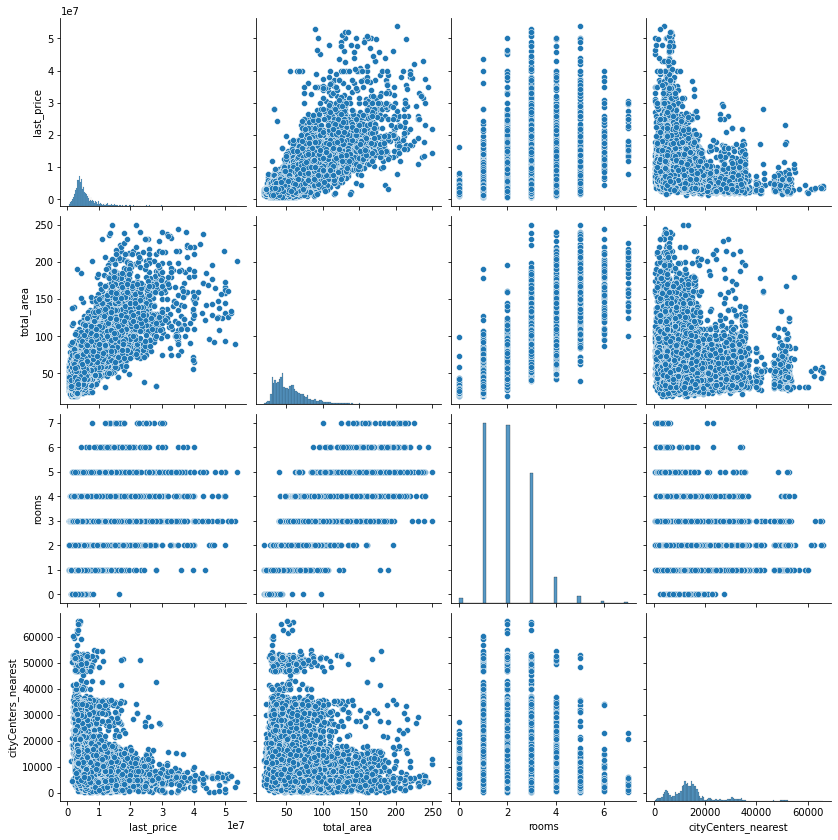

In [102]:
# check
sns.pairplot(data[['last_price', 'total_area', 'rooms', 'cityCenters_nearest']])
plt.gcf().set_size_inches(12,12);


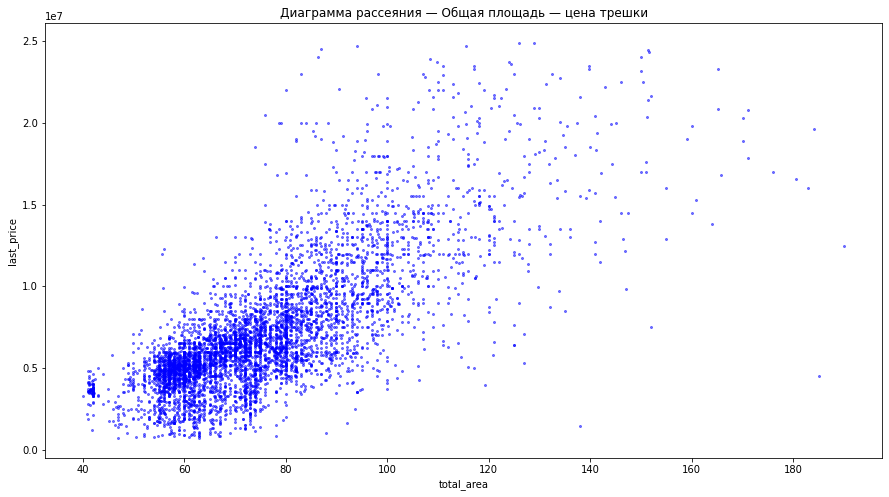

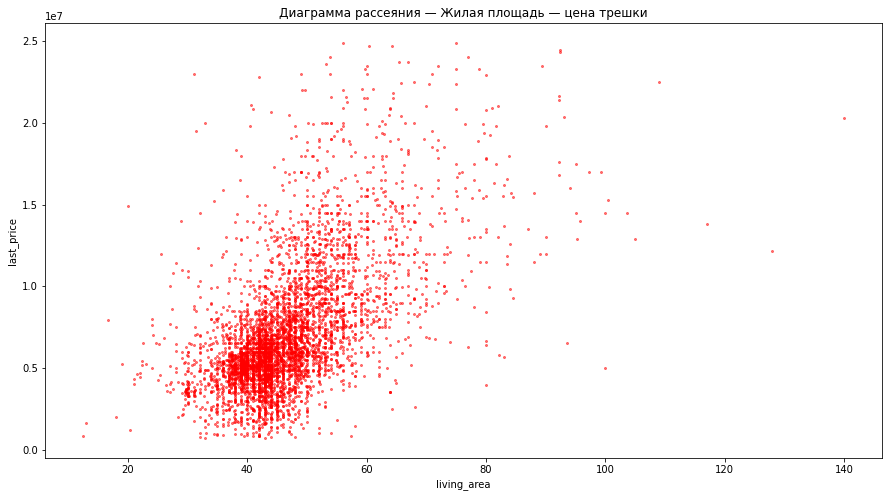

In [103]:
# check
data[data['rooms'] == 3].query('total_area < 201 and last_price < 25_000_000').plot(kind='scatter',
        y='last_price' , x='total_area', alpha=0.5, subplots=True, figsize=(15,8), c = 'b', s = 4)
plt.title('Диаграмма рассеяния — Общая площадь — цена трешки')


data[data['rooms'] == 3].query('total_area < 201 and last_price < 25_000_000').plot(kind='scatter', 
        y='last_price' , x='living_area', alpha=0.5, figsize=(15,8), c = 'r', s = 4)
plt.title('Диаграмма рассеяния — Жилая площадь — цена трешки');

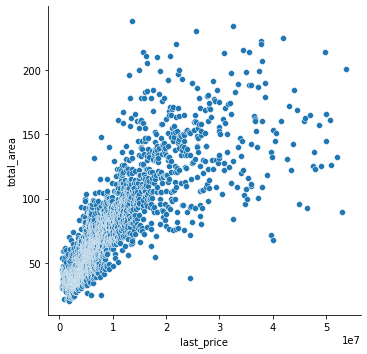

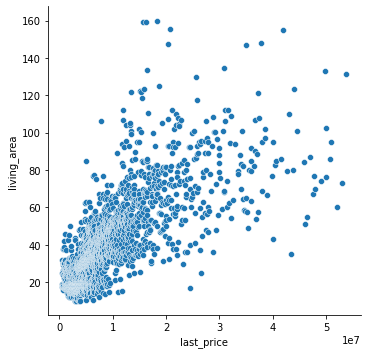

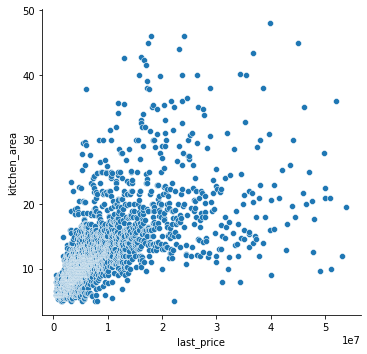

In [104]:
# check
price_pivot_area = data.pivot_table(index='last_price', values=([
    'total_area', 'living_area', 'kitchen_area']), aggfunc='median')
price_pivot_area = price_pivot_area.reset_index()
# Посмотрим на диаграммы рассеяния для столбцов 'total_area', 'living_area', 'kitchen_area'.
for row in ['total_area', 'living_area', 'kitchen_area']:
    sns.relplot(data=price_pivot_area, x='last_price', y=row, kind='scatter')

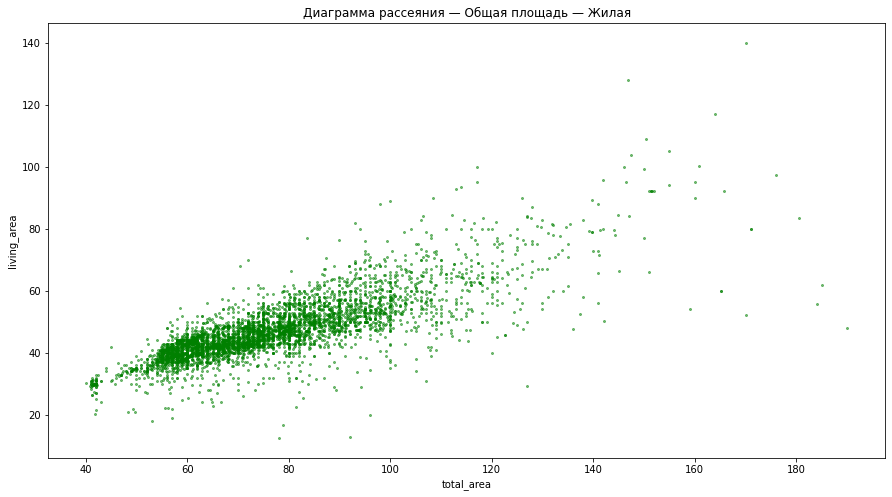

In [105]:
# check
data[data['rooms'] == 3].query('total_area < 201 and last_price < 25_000_000').plot(kind='scatter',
        y='living_area' , x='total_area', alpha=0.5, subplots=True, figsize=(15,8), c = 'g', s = 4)
plt.title('Диаграмма рассеяния — Общая площадь — Жилая');